In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score

In [131]:
heart_df = pd.read_csv('Heart_Failure_Clinical.csv', sep=',')
print("Kích thước bộ dữ liệu: ", heart_df.shape)
heart_df.head()

Kích thước bộ dữ liệu:  (299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,60.0,0,253,0,35,0,279000.00,1.70,140,1,0,250,0
1,40.0,1,129,0,35,0,255000.00,0.90,137,1,0,209,0
2,86.0,0,582,0,38,0,263358.03,1.83,134,0,0,95,1
3,45.0,0,582,0,35,0,385000.00,1.00,145,1,0,61,1
4,72.0,0,127,1,50,1,218000.00,1.00,134,1,0,33,0


In [132]:
y = heart_df.pop("DEATH_EVENT")
y = y.to_numpy()

In [133]:
scaler = StandardScaler()
heart_scaled = scaler.fit_transform(heart_df)

In [134]:
heart_train = {
    'data': heart_scaled[:250],
    'target': y[:250]
}

heart_test = {
    'data': heart_scaled[250:],
    'target': y[250:]
}

In [135]:
y_train_df = pd.DataFrame(data = heart_train['target'], columns = ['class'])
y_test_df = pd.DataFrame(data = heart_test['target'], columns = ['class'])

Text(0.5, 1.0, 'Training set')

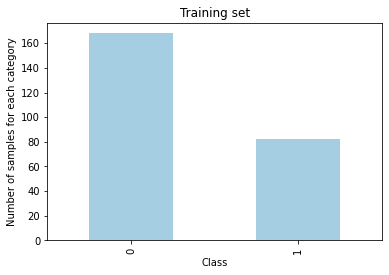

In [136]:
y_train_df['class'].value_counts().plot(kind='bar', colormap='Paired')
plt.xlabel("Class")
plt.ylabel("Number of samples for each category")
plt.title("Training set")

Text(0.5, 1.0, 'Testing set')

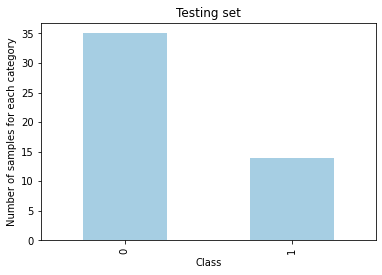

In [137]:
y_test_df['class'].value_counts().plot(kind='bar', colormap='Paired')
plt.xlabel("Class")
plt.ylabel("Number of samples for each category")
plt.title("Testing set")

In [138]:
def cross_validation(data, target, classifier, cv=5):
    return cross_val_score(classifier, data, target, cv=cv)

In [170]:
score_list = []
for quantity in range(1, 51):
    knn_clf = KNeighborsClassifier(n_neighbors=quantity)
    knn_clf.fit(heart_train["data"], heart_train["target"])
    scores = cross_validation(heart_scaled, y, knn_clf, cv=5)
    score_list.append(scores.mean())

Text(0.5, 0, 'Number of Neighbors used in KNeighborsRegressor')

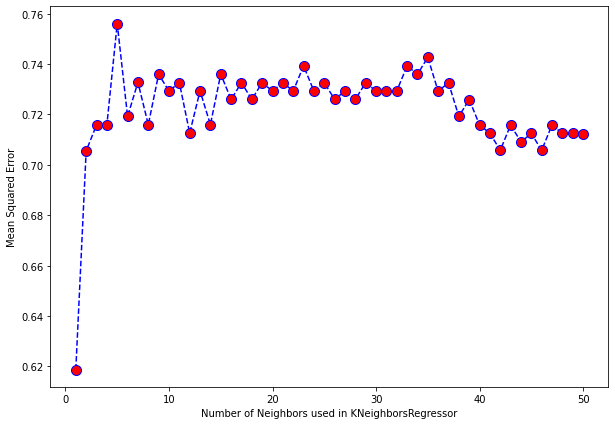

In [171]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 51), score_list, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.ylabel("Mean Squared Error")
plt.xlabel("Number of Neighbors used in KNeighborsRegressor")

In [186]:
knn_clf = KNeighborsClassifier()

In [199]:
param_grid = {
    'n_neighbors': range(1, 51),
    'metric': ['euclidean', 'manhattan', 'correlation'],
    'weights': ['uniform', 'distance']    
}

In [200]:
knn_model_selection = GridSearchCV(knn_clf, param_grid, cv=10, scoring='balanced_accuracy', verbose=1, n_jobs=1)

In [201]:
knn_model_selection.fit(heart_train['data'], heart_train['target'])

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'metric': ['euclidean', 'manhattan', 'correlation'],
                         'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='balanced_accuracy', verbose=1)

In [202]:
knn_model_selection.best_params_

{'metric': 'correlation', 'n_neighbors': 21, 'weights': 'uniform'}

In [203]:
knn_best = KNeighborsClassifier(**knn_model_selection.best_params_)

In [204]:
kf = KFold(n_splits=10, shuffle = True)

In [205]:
scores = cross_val_score(knn_best, heart_train['data'], heart_train['target'], cv=kf, scoring='balanced_accuracy')
ms_train = scores.mean()
print("X-val accuracy training after tuning: {0:4.2f}".format(ms_train))

X-val accuracy training after tuning: 0.69


In [206]:
y_pred_gs = knn_model_selection.predict(heart_test['data'])
ms_test = balanced_accuracy_score(heart_test['target'],y_pred_gs)
print("Hold-out accuracy after tuning: {0:4.2f}".format(ms_test))

Hold-out accuracy after tuning: 0.65
